Placement selection model

# Placement Selection Model

This notebook demonstrates a simple linear regression model to predict package values based on CGPA. It also includes an initial exploration of another dataset with multiple features and a target variable.

## Table of Contents
1. [Project Overview](#project-overview)
2. [Installation](#installation)
3. [Dataset](#dataset)
4. [Model](#model)
5. [Usage](#usage)

## Project Overview
This project contains two main parts:
*   **Multi-feature Linear Regression**: An example of linear regression using a synthetic dataset (`make_regression`) with two features (`feature1`, `feature2`) to predict a `target` variable.
*   **CGPA to Package Prediction**: A simple linear regression model to predict job package (in lakhs per annum) based on a student's CGPA, using the `placement.csv` dataset.

## Installation
This notebook uses common Python libraries for data science. You can install them using pip:
```bash
pip install pandas numpy seaborn matplotlib scikit-learn statsmodels scipy plotly gradio
```

## Dataset
Two datasets are implicitly used in this notebook:
1.  **Synthetic Dataset**: Generated using `sklearn.datasets.make_regression` with 2 features and 1 target, and some noise. This dataset is used for the multi-feature regression example.
2.  **`placement.csv`**: This CSV file is expected to have two columns: `cgpa` and `package`. It is used to train the simple linear regression model for package prediction.

_Note: The `placement.csv` file should be available in the `/content/` directory or the specified path for the `pd.read_csv` command._

## Model
The core model used in both sections is `LinearRegression` from `sklearn.linear_model`. This model is trained to find a linear relationship between the input features and the target variable.

## Usage

### Multi-feature Regression Example
This section demonstrates basic linear regression concepts:
-   Data generation (`make_regression`)
-   Data splitting (`train_test_split`)
-   Model training (`LinearRegression`)
-   Residual analysis (normality, homoscedasticity)
-   Multicollinearity check (VIF, correlation heatmap)

### CGPA to Package Predictor
1.  **Load Data**: The `placement.csv` file is loaded into a pandas DataFrame.
2.  **Visualize Data**: A scatter plot visualizes the relationship between CGPA and Package.
3.  **Train Model**: A `LinearRegression` model is trained on the CGPA and Package data.
4.  **Prediction**: The trained model can be used to predict packages for new CGPA values.
5.  **Interactive Predictor**: A Gradio interface is created to provide an interactive way to predict packages based on CGPA input.

To run the Gradio app, execute the last code cell of the notebook. It will provide a local URL and a public share link if run in Colab.

In [ ]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/data.csv")

In [ ]:
X= df.iloc[:,0:3].values
y= df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#residual
y_pred = model.predict(X_test)
residual = y_test - y_pred

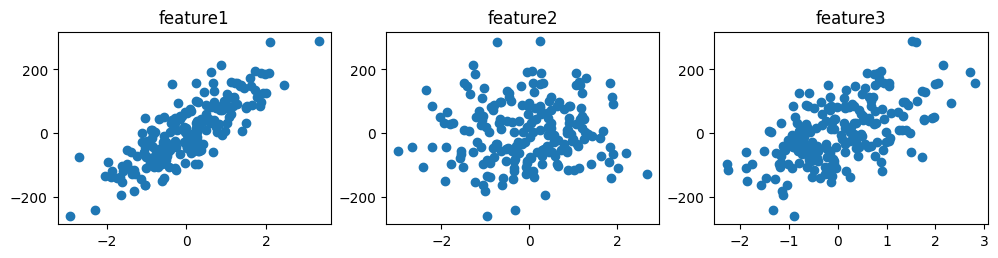

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))
ax1.scatter(df['feature1'], df['target'])
ax1.set_title('feature1')
ax2.scatter(df['feature2'], df['target'])
ax2.set_title('feature2')
ax3.scatter(df['feature3'], df['target'])
ax3.set_title('feature3')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(X.shape[1]):
  vif.append(variance_inflation_factor(X_train,i))

In [ ]:
pd.DataFrame({'vif': vif}, index = df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


<Axes: >

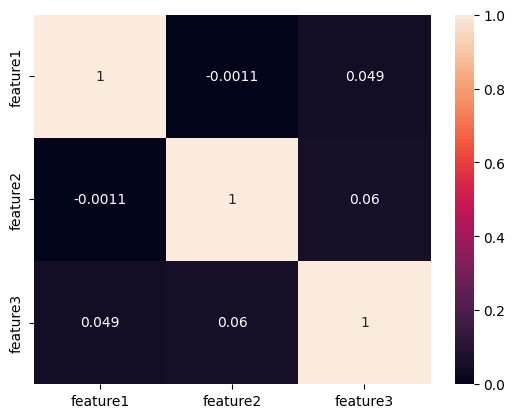

In [ ]:
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

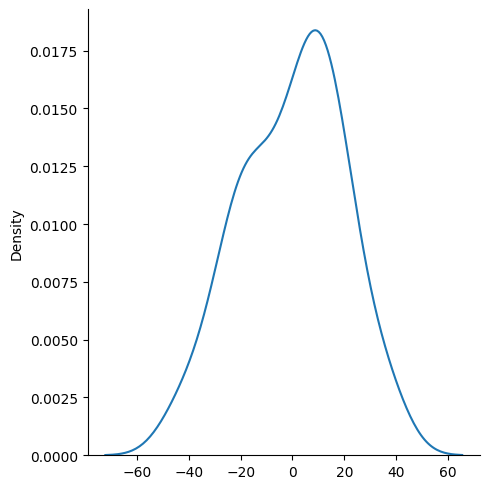

In [ ]:
#normality of residual
sns.displot(residual,kind='kde')

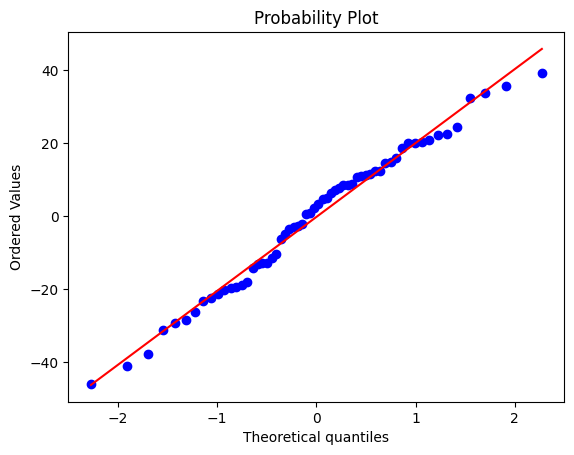

In [ ]:
#qq plot
import scipy as sp
fig, ax = plt.subplots(1,1)
sp.stats.probplot(residual,plot=ax)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#residual
y_pred = model.predict(X_test)
residual = y_test - y_pred

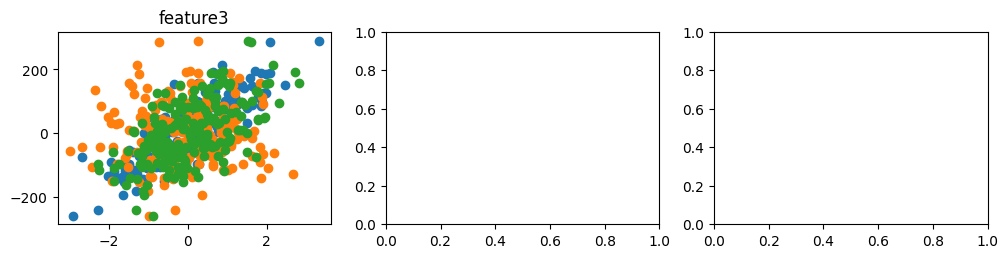

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))
ax1.scatter(df['feature1'], df['target'])
ax1.set_title('feature1')
ax1.scatter(df['feature2'], df['target'])
ax1.set_title('feature2')
ax1.scatter(df['feature3'], df['target'])
ax1.set_title('feature3')
plt.show()

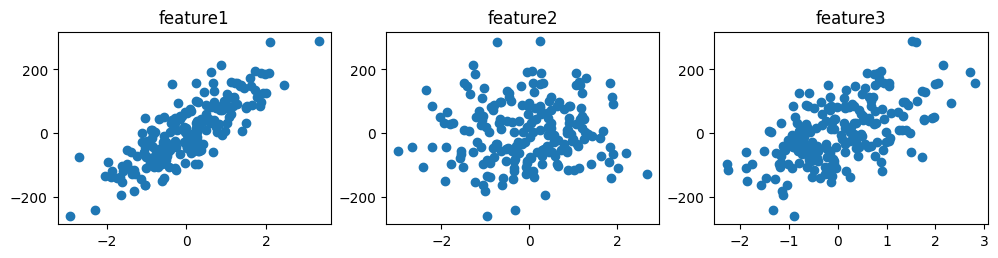

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))
ax1.scatter(df['feature1'], df['target'])
ax1.set_title('feature1')
ax2.scatter(df['feature2'], df['target'])
ax2.set_title('feature2')
ax3.scatter(df['feature3'], df['target'])
ax3.set_title('feature3')
plt.show()

In [ ]:
#multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(X.shape[1]):
  vif.append(variance_inflation_factor(X_train,i))

In [ ]:
pd.DataFrame({'vif': vif}, index = df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


<Axes: >

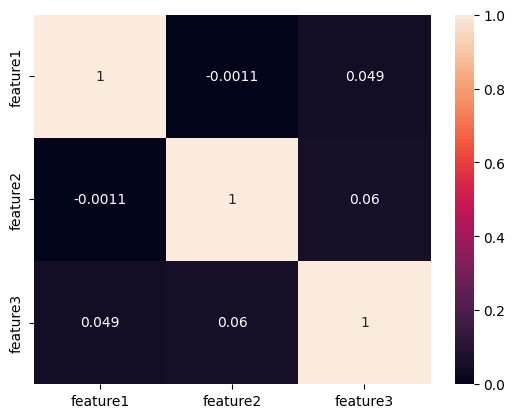

In [ ]:
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

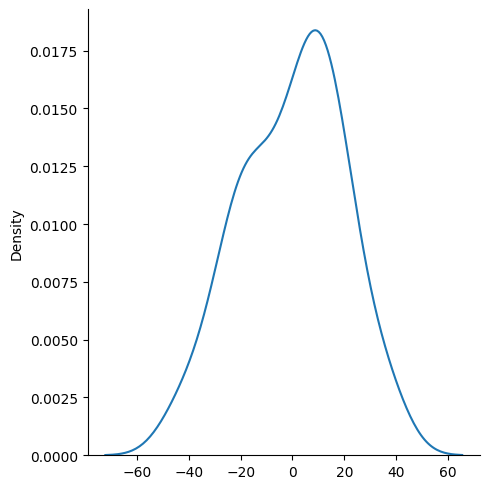

In [ ]:
sns.displot(residual,kind='kde')

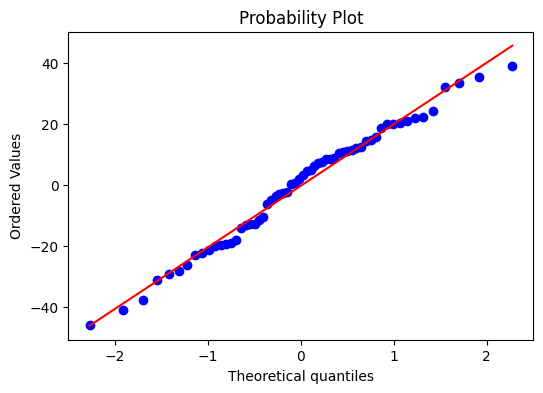

In [ ]:
import scipy as sp

fig,ax=plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)

plt.show()

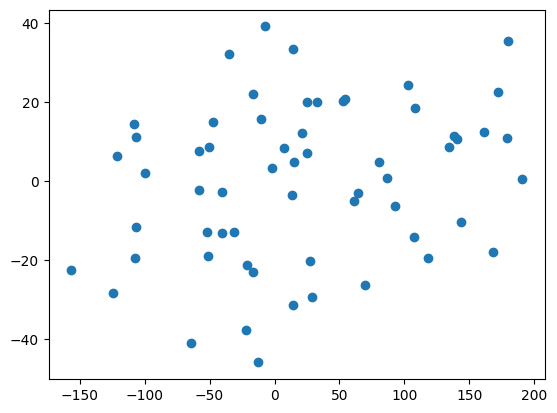

In [ ]:
plt.scatter(y_pred,residual)

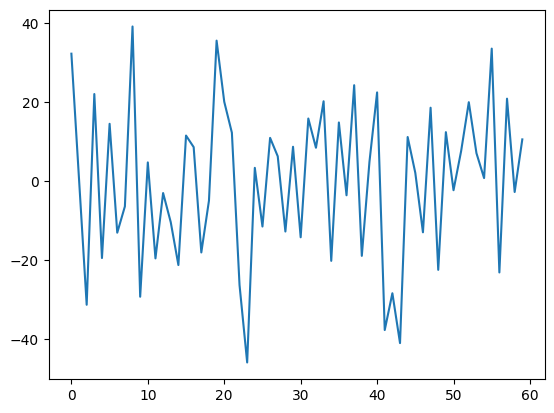

In [ ]:
plt.plot(residual)

In [ ]:
df1=pd.read_csv(r"placement.csv")

In [ ]:
df1.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package(in lpa)')

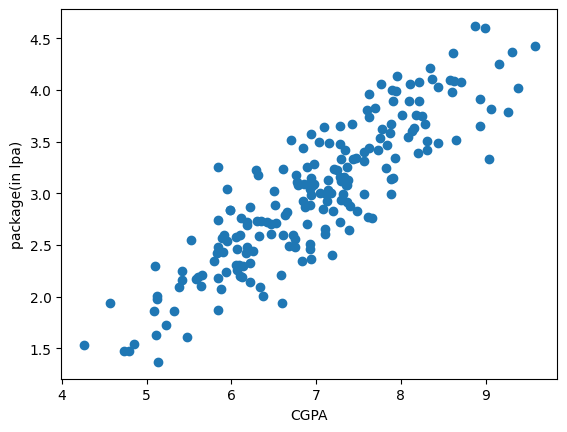

In [ ]:
plt.scatter(df1['cgpa'],df1['package'])
plt.xlabel('CGPA')
plt.ylabel('package(in lpa)')

In [ ]:
x = df1.iloc[:,0:1]
y = df1.iloc[:,-1]

In [ ]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [ ]:
from  sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x, y)

LinearRegression()

In [ ]:
X_test

array([[-0.83423985,  1.34499246,  0.48624933],
       [ 0.62747389, -0.05394785,  2.71192633],
       [ 0.12800782,  1.24161652,  0.08841521],
       [-0.4129564 ,  1.27727436,  0.25622178],
       [ 1.86950756,  0.66590511, -0.33750905],
       [-0.9148222 , -0.89713978, -0.78420535],
       [-0.41619802,  0.72465766, -0.18907167],
       [ 1.16788229, -0.02410447,  0.14506321],
       [-0.38466318,  0.04365869,  0.38033506],
       [ 0.13801466,  0.93950285,  0.34379452],
       [ 0.73146574,  0.42596675, -0.7160258 ],
       [-1.3580452 , -0.06711047, -0.16943686],
       [ 1.11594518, -0.03030337, -0.31959014],
       [ 0.69405227, -0.51112899,  1.72941743],
       [-0.27273554, -2.67652137, -0.04184423],
       [ 1.6265736 , -1.41987131,  0.35081584],
       [-1.0259683 , -1.89787143,  0.43175699],
       [ 2.45758763,  1.06721555, -0.19829026],
       [-0.15851092, -1.05080794,  1.34407129],
       [ 0.87428572, -1.29353663,  2.15814934],
       [ 1.07168393, -1.22090192, -0.862

In [ ]:
lr.predict(X_test[0].reshape(1, -1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but LinearRegression is expecting 1 features as input.

Text(0, 0.5, 'Package(in lpa)')

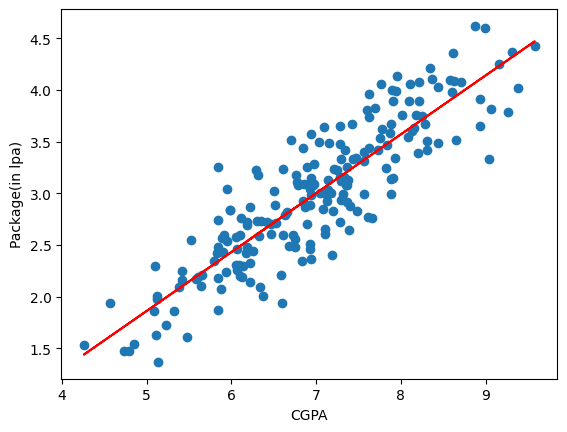

In [ ]:
plt.scatter(df1['cgpa'],df1['package'])
plt.plot(x,lr.predict(x),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [ ]:
m = lr.intercept_

In [ ]:
m

np.float64(0.3580457358713267)

In [ ]:
b = model.coef_

In [ ]:
b

array([72.74877711, -0.2771884 , 53.33861608])

In [ ]:
b*8.85+m

array([644.18472318,  -2.09507162, 472.40479801])

In [ ]:
import gradio as gr
import numpy as np
def predict(cgpa):
     return lr.predict([[cgpa]])[0]
gr.Interface(
    fn=predict,
    inputs=gr.Slider(minimum=df['cgpa'].min(),maximum=df['cgpa'].max(),label="cgpa"),
    outputs="number",
    title="cgpa to package predictor",
    description="predict package from cgpa using linear regression model").launch(inline=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6db06130af9eeaad7b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
X,y = make_regression(n_samples=100, n_features=2,n_informative=2, n_targets=1, noise=50 )

In [ ]:
df = pd.DataFrame({'feature1': X[:,0],'feature2':X[:,1],'target':y})
df['y'] = y

In [ ]:
df.shape

(100, 3)

In [ ]:
df.head()

,feature,target,y
0,-1.936300,-23.587384,-23.587384
1,1.734765,51.605170,51.605170
2,-0.214909,-87.633269,-87.633269
3,-0.544795,-79.427388,-79.427388
4,1.303751,27.420651,27.420651


In [ ]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')
fig.show()